In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [3]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


### Load all training images and labels

In [ ]:
# load all training images and labels
train_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/ever/trainImgs'
train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/train.csv')
# print(train)

trainImg_names = list(train['img name']) 
input_size = 256
print('loading images ...')
X_train = []
for idx, name in enumerate(trainImg_names):
    img = image.load_img(os.path.join(train_img_folder, name +'.png'), color_mode = "grayscale", target_size = (input_size, input_size))
    img = image.img_to_array(img)
    X_train.append(img)
    print(idx, name)
X_train = np.array(X_train).astype(np.float32)/255
y_train = np.array(train['tumor types'])

# convert class vectors to binary class matrices
y_train_onehot = tf.keras.utils.to_categorical(y_train)
print(y_train_onehot.shape)

print('loading finished ...')
print(X_train.shape, y_train_onehot)

In [ ]:
# save data

saved_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/new_data/'
output_train_data_name = "saved_X_train.npy"
output_train_data_path = saved_img_folder + output_train_data_name
print(X_train.shape)
np.save(output_train_data_path, X_train)

output_label_data_name = "saved_y_train_onehot.npy"
output_label_data_path = saved_img_folder + output_label_data_name
print(y_train_onehot.shape)
np.save(output_label_data_path, y_train_onehot)

In [4]:
#load data

saved_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/new_data/'
output_train_data_name = "saved_X_train.npy"
output_train_data_path = saved_img_folder + output_train_data_name
X_train = np.load(output_train_data_path)

output_label_data_name = "saved_y_train_onehot.npy"
output_label_data_path = saved_img_folder + output_label_data_name
y_train_onehot = np.load(output_label_data_path)

#### Your model here

In [5]:
num_classes = 2

#model = ...
#model.compile(...)
#history = model.fit(X_train, y_train_onehot, ...)

In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import datetime
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [14]:
inputs = Input(shape=(256, 256, 1))
conv1 = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
pool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(filters=64, kernel_size=3, padding='same')(pool1)
pool2 = MaxPooling2D()(conv2)
conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
flat = Flatten()(conv3b)
dropout1 = Dropout(0.1)(flat)
dense1 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(dense1)
dense2 = Dense(128, activation='relu')(dropout2)
outputs = Dense(num_classes, activation='sigmoid')(dense2)

cnn1 = Model(inputs, outputs)

In [8]:
train_data, validation_data, y_train, validation_label = \
            train_test_split(X_train, y_train_onehot, test_size=0.2,\
                stratify=y_train_onehot,
                random_state=20)

In [13]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=15,
    )

In [15]:
now = datetime.datetime.now
t = now()


cnn1.compile(optimizer=Adam(learning_rate=0.001),
             # optimizer='adam',
                  loss='binary_crossentropy',
                  # loss = "categorical_crossentropy",
                  metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)]

history = cnn1.fit(datagen.flow(train_data, y_train, batch_size=64),
              steps_per_epoch=len(train_data)/64, epochs=100,
              validation_data=(validation_data, validation_label), 
              verbose=1,
              #callbacks=[EarlyStopping(monitor='val_loss', patience = 5)]
              callbacks=callbacks
              )

print('Training time: %s' % (now() - t))

Epoch 1/100
29/29 [==============================] - 9s 279ms/step - loss: 4.0584 - accuracy: 0.5270 - val_loss: 1.1439 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 8s 267ms/step - loss: 2.2972 - accuracy: 0.5370 - val_loss: 0.7400 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 8s 266ms/step - loss: 0.7423 - accuracy: 0.5296 - val_loss: 0.6735 - val_accuracy: 0.5765 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 8s 266ms/step - loss: 0.6766 - accuracy: 0.5899 - val_loss: 0.6646 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 8s 266ms/step - loss: 0.6661 - accuracy: 0.6162 - val_loss: 0.6539 - val_accuracy: 0.6080 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 8s 266ms/step - loss: 0.6669 - accuracy: 0.6193 - val_loss: 0.6403 - val_accuracy: 0.6101 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 8s 266ms/st

In [16]:
import matplotlib.pyplot as plt


def plot_hist():
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy'] 
  val_acc = history.history['val_accuracy']

  epochsn = np.arange(1, len(train_loss)+1,1)
  plt.figure(figsize=(12, 4))

  plt.subplot(1,2,1)
  plt.plot(epochsn, acc, 'b', label='Training Accuracy')
  plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
  plt.grid(color='gray', linestyle='--')
  plt.legend()            
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochsn,train_loss, 'b', label='Training Loss')
  plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
  plt.grid(color='gray', linestyle='--')
  plt.legend()
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show() 

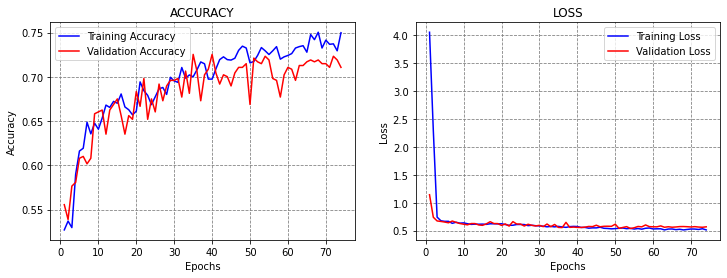

In [17]:
plot_hist()

#### Load test imgs

In [ ]:
import glob

test_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/ever/testImgs/'
testImg_names = glob.glob(test_img_folder + "*.png")

input_size = 256
print('loading test images ...')
X_test = []
for idx, name in enumerate(testImg_names):
    img = image.load_img(name, color_mode = "grayscale", target_size = (input_size, input_size))
    img = image.img_to_array(img)
    X_test.append(img)
    print(idx, name)
X_test = np.array(X_test).astype(np.float32)
print('loading finished')

In [ ]:
# save test data

saved_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/new_data/'
output_test_data_name = "saved_X_test.npy"
output_test_data_path = saved_img_folder + output_test_data_name
print(X_test.shape)
np.save(output_test_data_path, X_test)

In [18]:
#load test data
saved_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/new_data/'
output_test_data_name = "saved_X_test.npy"
output_test_data_path = saved_img_folder + output_test_data_name
X_test = np.load(output_test_data_path)

#### Pedict the labels for test images

In [19]:
test_pred = cnn1.predict(X_test)
test_pred_class = np.argmax(test_pred, axis = 1)
test_pred_class

39/39 [==============================] - 0s 8ms/step


array([0, 0, 0, ..., 0, 0, 0])

#### Save results to csv file

In [20]:
import glob
test_img_folder = '/content/drive/MyDrive/Colab_Notebooks/F22_DL_HW4_train_test/ever/testImgs/'
testImg_names = glob.glob(test_img_folder + "*.png")

In [21]:
df = pd.DataFrame({'name': list(testImg_names),
                   'pred': list(test_pred_class)})
df.to_csv(saved_img_folder + 'test_pred.csv')